In [72]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from env import get_db_url
import wrangle_mall



In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
train, validate, test = wrangle_mall.split_data(iris)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [5]:
X = train[['petal_width','sepal_width']]

In [6]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

kmeans.predict(X)

array([2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2], dtype=int32)

In [7]:
train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

Text(0.5, 1.0, 'No clusters')

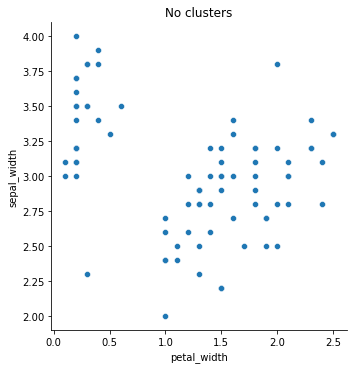

In [8]:
sns.relplot(data = train, x='petal_width', y='sepal_width')
plt.title("No clusters")

Text(0.5, 1.0, 'With 3 clusters')

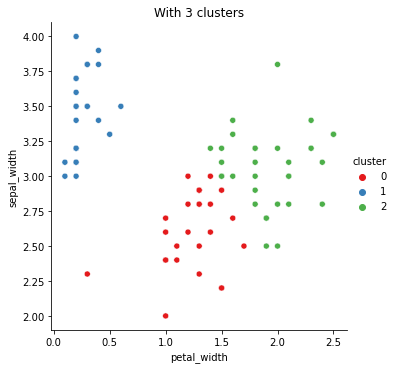

In [9]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'cluster', palette='Set1')
plt.title("With 3 clusters")

Text(0.5, 1.0, 'With 3 clusters')

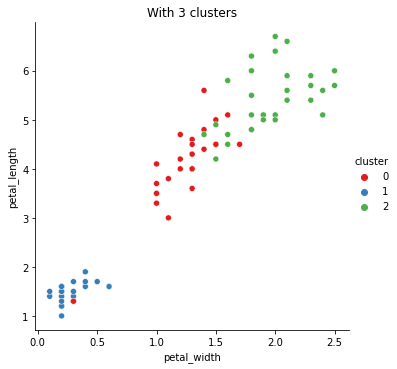

In [10]:
sns.relplot(data = train, x='petal_width', y='petal_length', hue = 'cluster', palette='Set1')
plt.title("With 3 clusters")

Text(0.5, 1.0, 'Actual species')

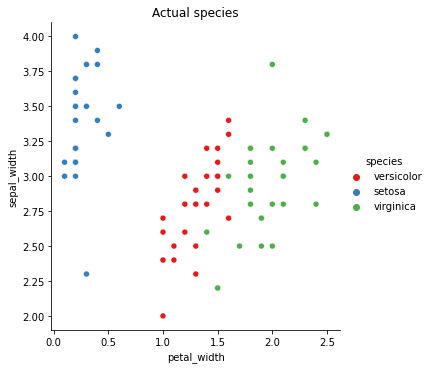

In [11]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'species', palette='Set1')
plt.title("Actual species")

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,1.240741,2.614815
1,0.260000,3.440000
2,1.931250,3.056250


In [13]:
train.groupby('cluster')['petal_width', 'sepal_width'].mean()


,petal_width,sepal_width
cluster,,
0,1.240741,2.614815
1,0.260000,3.440000
2,1.931250,3.056250


Text(0.5, 1.0, 'Visualizing Cluster Centers')

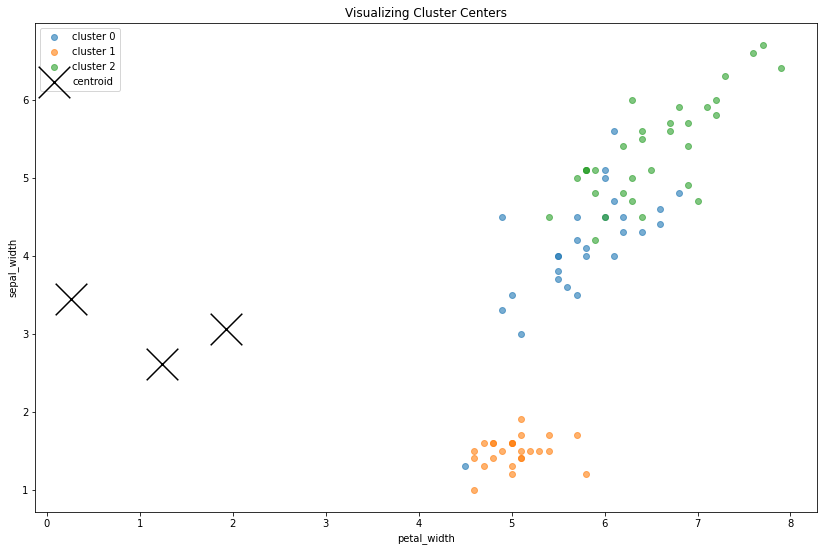

In [14]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')


Text(0.5, 1.0, '2 cluster')

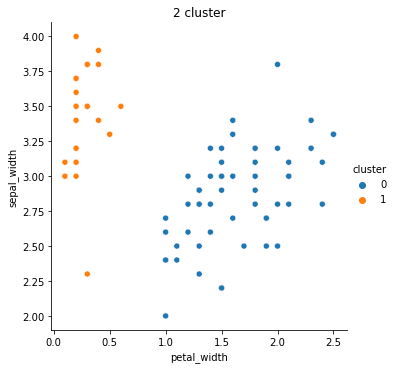

In [15]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster')
plt.title("2 cluster")


Text(0.5, 1.0, '5 clusters')

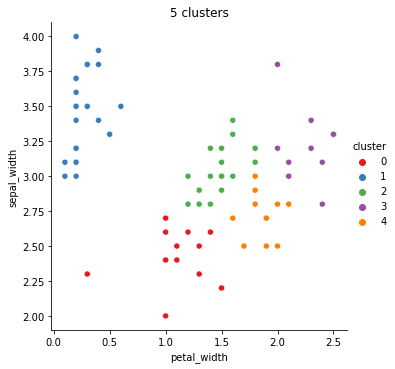

In [16]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster', palette='Set1')
plt.title("5 clusters")


### elbow

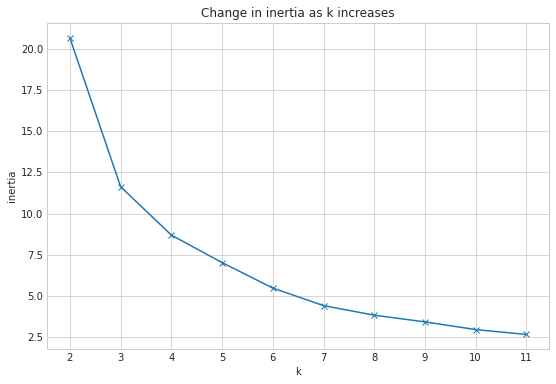

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


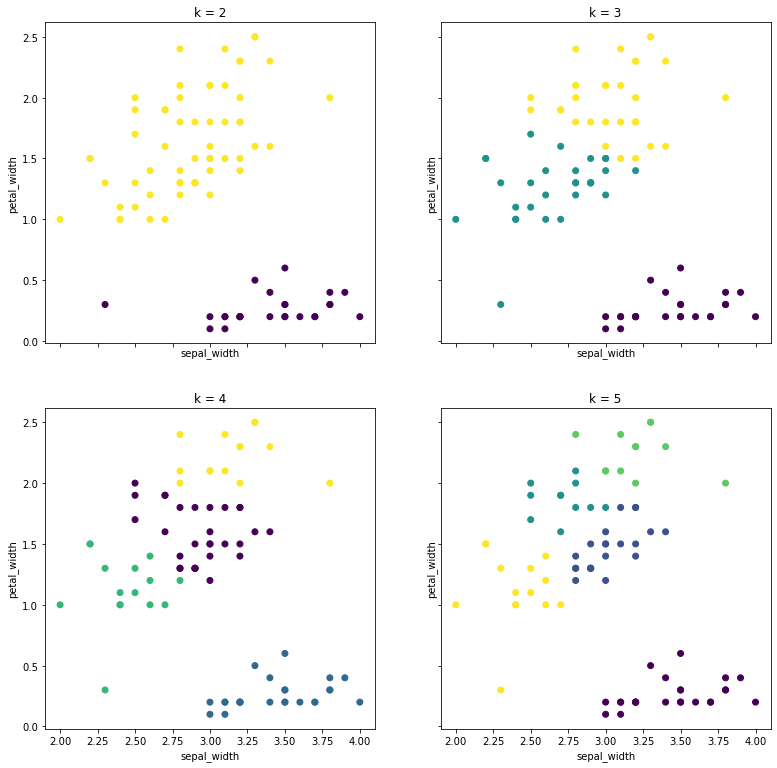

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_width')


In [19]:
X = train[['petal_length','petal_width','sepal_length']]

In [20]:
kmean = KMeans(n_clusters=4, random_state=123)
kmean.fit(X)

KMeans(n_clusters=4, random_state=123)

In [21]:
train['cluster'] = kmean.predict(X)

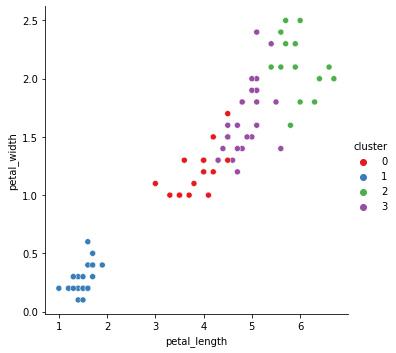

In [22]:
sns.relplot(data = train, x='petal_length', y = 'petal_width', hue = 'cluster', palette='Set1')

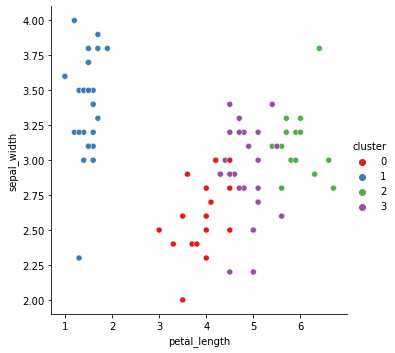

In [23]:
sns.relplot(data = train, x='petal_length', y = 'sepal_width', hue = 'cluster', palette='Set1')

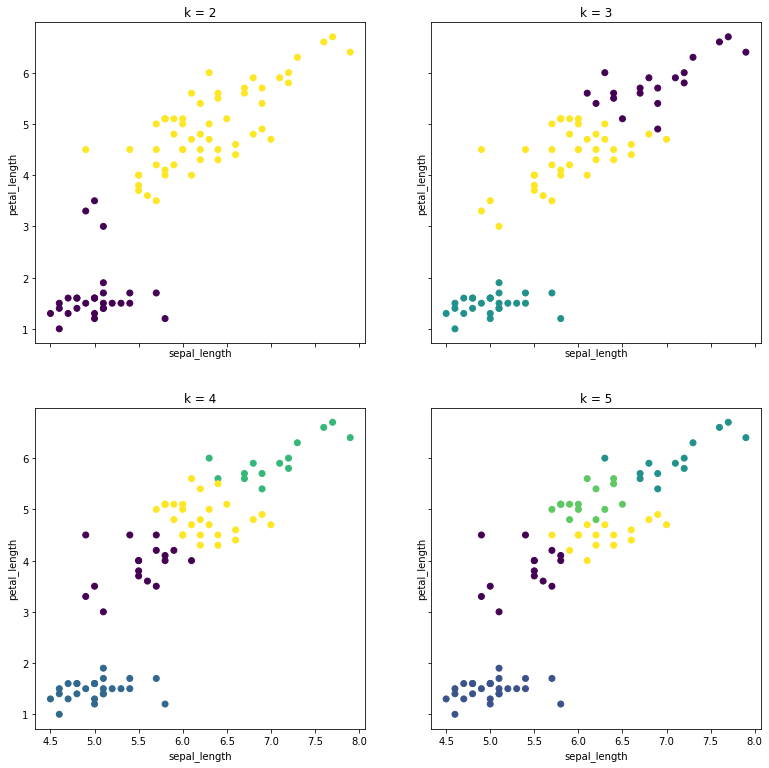

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_length', ylabel='petal_length')



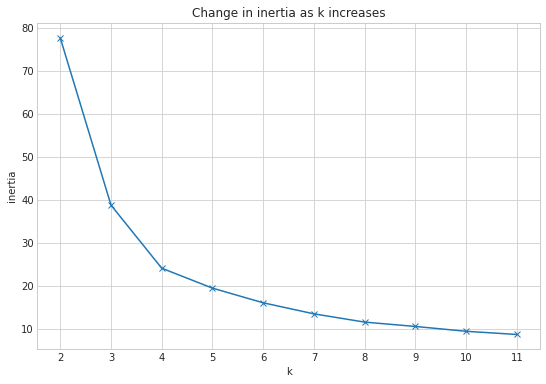

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')



## After 4 dropoff not so much

# MALL CUSTOMERS

In [26]:
train, validate, test = wrangle_mall.wrangle_mall()

Using cached data
Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [27]:
train

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
123,124,39,69,91,1,0.403846,0.442623,0.957447
76,77,45,54,53,0,0.519231,0.319672,0.553191
171,172,28,87,75,1,0.192308,0.590164,0.787234
10,11,67,19,14,1,0.942308,0.032787,0.138298
35,36,21,33,81,0,0.057692,0.147541,0.851064
...,...,...,...,...,...,...,...,...
175,176,30,88,86,0,0.230769,0.598361,0.904255
101,102,49,62,48,0,0.596154,0.385246,0.500000
148,149,34,78,22,0,0.307692,0.516393,0.223404
99,100,20,61,49,1,0.038462,0.377049,0.510638


#### Will try clustering on age and gender

In [28]:
X = train[['age_scaled','gender_Male']]

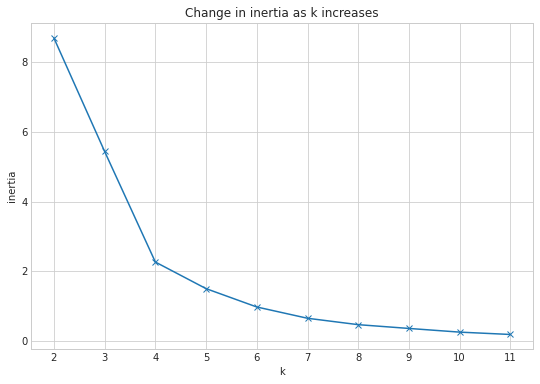

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Four looks good

In [30]:
kmean = KMeans(n_clusters=4, random_state=123)
kmean.fit(X)

KMeans(n_clusters=4, random_state=123)

In [31]:
train['cluster'] = kmean.predict(X)

In [32]:
# clustering by age and gender
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,102.534884,28.837209,60.209302,60.511628,0.0,0.208408,0.370568,0.633102
1,103.464286,29.357143,62.392857,58.428571,1.0,0.218407,0.388466,0.610942
2,97.346154,52.153846,61.269231,36.730769,0.0,0.656805,0.379256,0.380115
3,85.933333,59.000000,54.600000,42.333333,1.0,0.788462,0.324590,0.439716


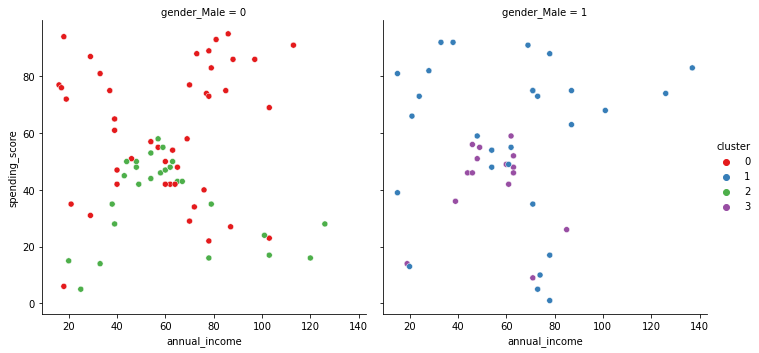

In [33]:
sns.relplot(data = train, x = 'annual_income', y='spending_score', hue='cluster', col='gender_Male', palette='Set1')

### Not very effective but interesting that most cluster 1s have higher annual incomes while most cluster 2s have lower annual 

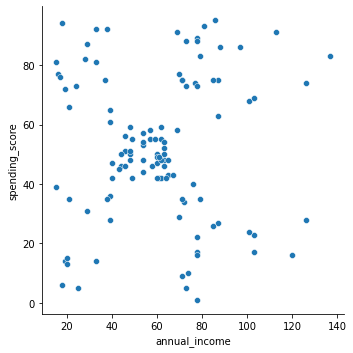

In [34]:
sns.relplot(data = train, x='annual_income', y = 'spending_score')

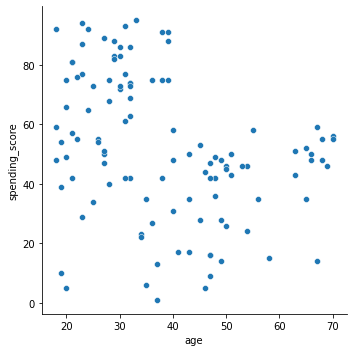

In [35]:
sns.relplot(data = train, x='age', y = 'spending_score')


In [36]:
X = train[['age_scaled', 'annual_income_scaled']]

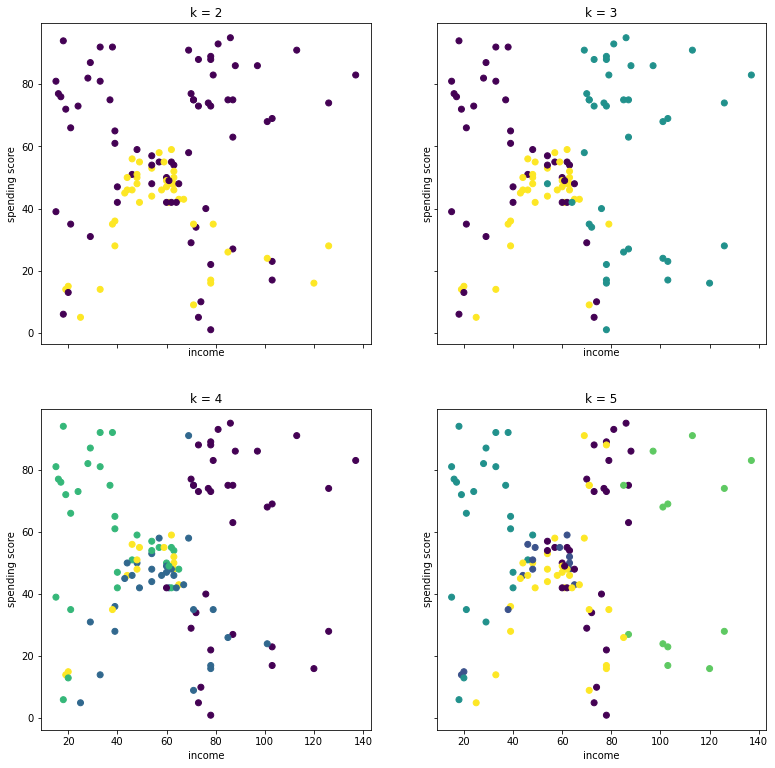

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='income', ylabel='spending score')




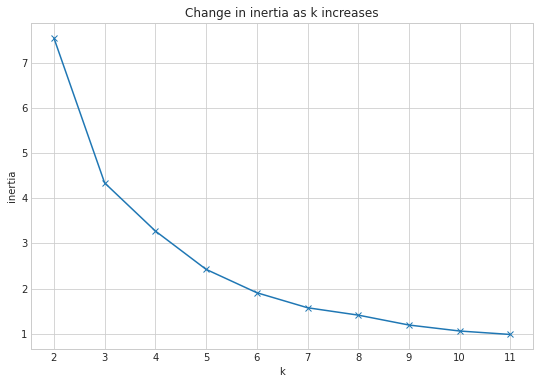

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [39]:
7.5-3

4.5

## 3 looks best


In [40]:
kmean=KMeans(n_clusters=3, random_state=123)
kmean.fit(X)

train['cluster'] = kmean.predict(X)

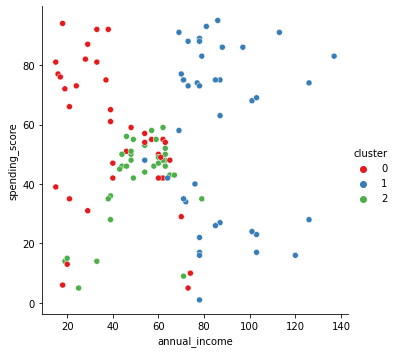

In [41]:
sns.relplot(data = train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'Set1')

### Clustering on age and income doesn't seem to segment data so meaningfully

In [42]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled,cluster
123,124,39,69,91,1,0.403846,0.442623,0.957447,1
76,77,45,54,53,0,0.519231,0.319672,0.553191,2
171,172,28,87,75,1,0.192308,0.590164,0.787234,1
10,11,67,19,14,1,0.942308,0.032787,0.138298,2
35,36,21,33,81,0,0.057692,0.147541,0.851064,0


In [43]:
# Will try clustering on age, income, and spending score
X=train[['age_scaled','annual_income_scaled','spending_score_scaled']]

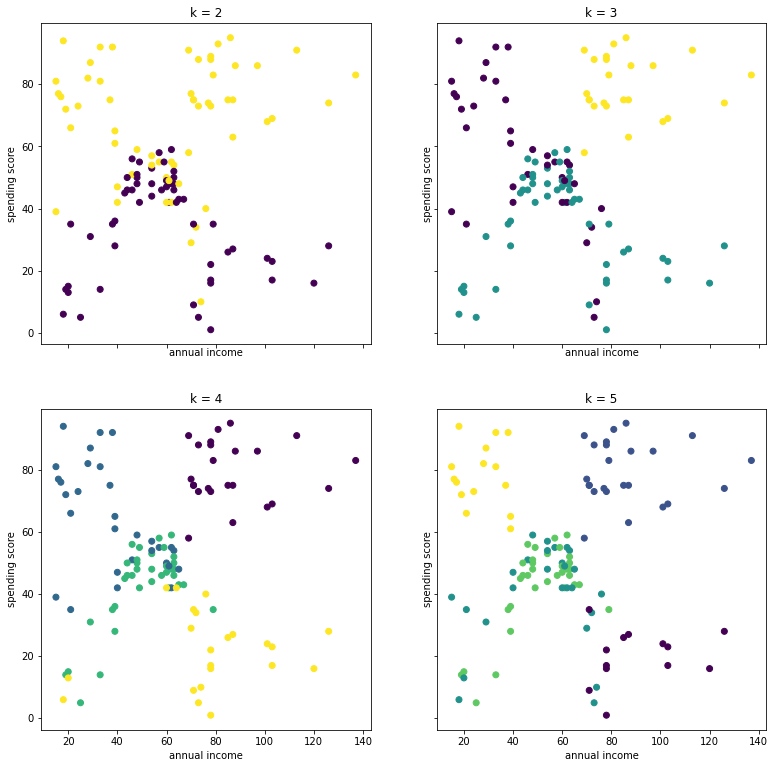

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k, random_state=123).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score')





In [45]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)

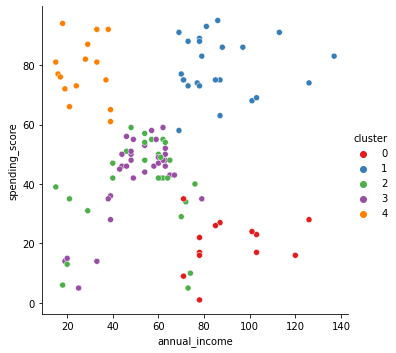

In [46]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue = 'cluster', palette='Set1')

In [47]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,166.384615,42.923077,90.692308,20.076923,0.384615,0.479290,0.620429,0.202946
1,160.708333,32.791667,86.541667,79.250000,0.416667,0.284455,0.586407,0.832447
2,82.192308,26.692308,52.230769,39.884615,0.346154,0.167160,0.305170,0.413666
3,76.500000,56.176471,50.823529,42.764706,0.382353,0.734163,0.293635,0.444305
4,24.533333,23.600000,27.066667,78.266667,0.400000,0.107692,0.098907,0.821986


<AxesSubplot:xlabel='cluster'>

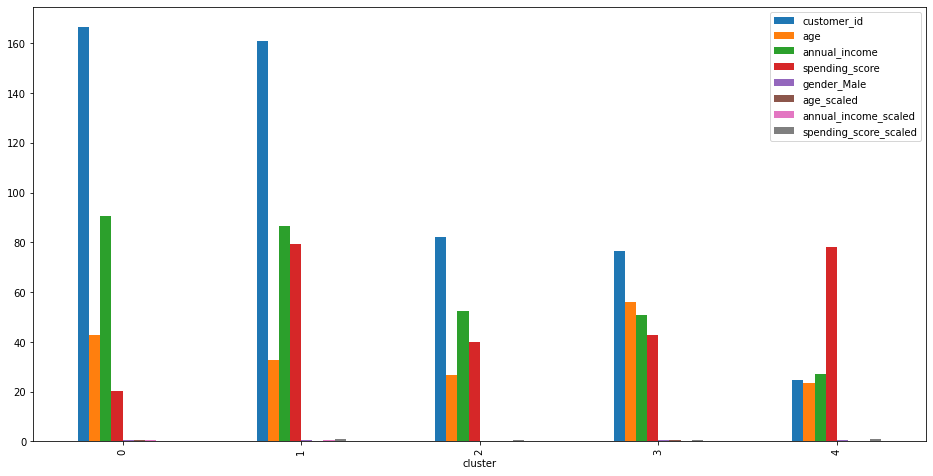

In [48]:
train.groupby('cluster').mean().plot.bar(figsize=(16,8))


## not so effective. will try just spending score and annual income

In [49]:
X=train[['spending_score_scaled', 'annual_income_scaled']]

Best k value: 5


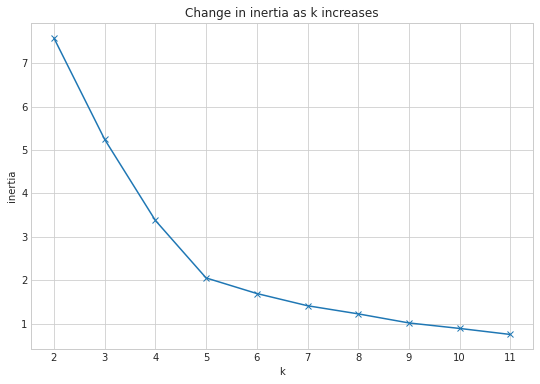

In [50]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [51]:
kmeans = KMeans(5, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=123)

In [52]:
train['cluster']=kmeans.predict(X)

In [53]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,162.347826,32.478261,87.304348,80.173913,0.434783,0.278428,0.592659,0.842276
1,88.239130,44.065217,56.108696,49.152174,0.369565,0.501254,0.336957,0.512257
2,23.333333,45.666667,26.333333,22.583333,0.333333,0.532051,0.092896,0.229610
3,23.142857,23.071429,26.214286,79.500000,0.428571,0.097527,0.091920,0.835106
4,160.529412,38.705882,86.823529,19.941176,0.352941,0.398190,0.588717,0.201502


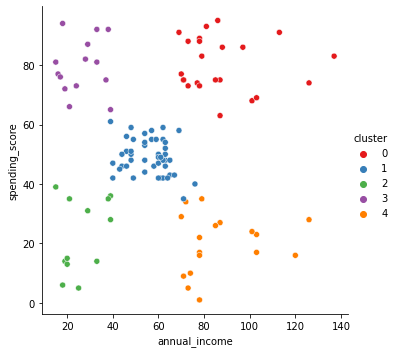

In [54]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue='cluster', palette='Set1')

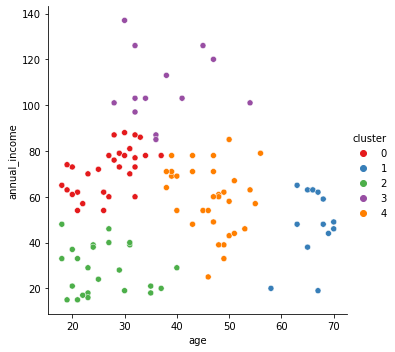

In [49]:
sns.relplot(data = train, x='age', y = 'annual_income', hue='cluster', palette='Set1')

## Yep, that does it best:
- low income, young (1)
- low income, older (2)
- middle income, all ages (3)
- high income, young (4)
- high income, older (0)

# Bonus

In [55]:
url = "https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0"
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

In [56]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


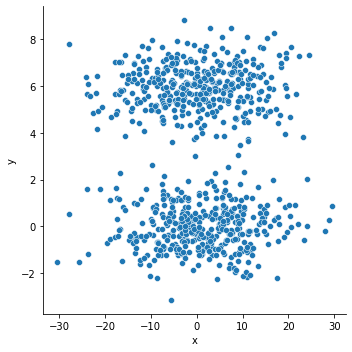

In [57]:
sns.relplot(data = df, x='x', y='y')

Looks like two oval clusters

In [58]:
X=df

Best k value: 3


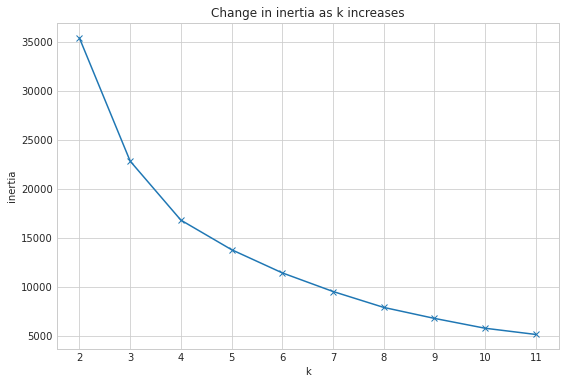

In [61]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k, random_state=123).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [62]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=123)

In [63]:
df['cluster'] = kmeans.predict(X)

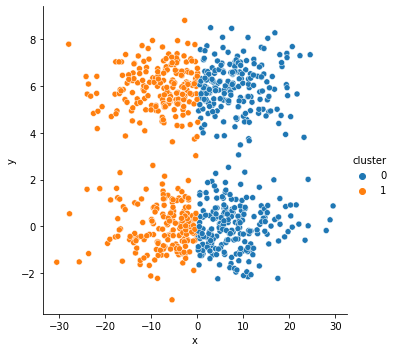

In [64]:
sns.relplot(data = df, x='x', y='y', hue='cluster')

# WOH!

In [89]:
scaler = MinMaxScaler()

In [90]:
df

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0
...,...,...,...
795,3.941363,5.807617,0
796,6.057122,6.010463,0
797,8.373651,4.641515,0
798,-2.058756,6.077125,1


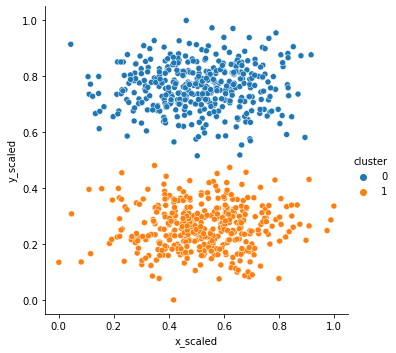

In [91]:
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

X = scaled_df[['x_scaled','y_scaled']]

kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(X)
scaled_df["cluster"] = kmean.predict(X)

sns.relplot(data = scaled_df, x='x_scaled', y='y_scaled', hue='cluster')

# GOT IT!

### Scaled data is important  for kmeans as it relies on distance. Can through off results if unscaled.

In [92]:
# MinMax
X.describe()

,x_scaled,y_scaled
count,800.000000,800.000000
mean,0.517478,0.511507
std,0.164934,0.263832
min,0.000000,0.000000
25%,0.407973,0.259004
50%,0.518699,0.517143
75%,0.635204,0.764212
max,1.000000,1.000000


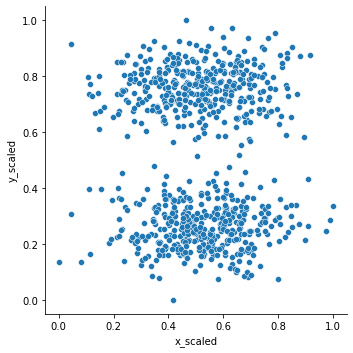

In [93]:
sns.relplot(data = X, x='x_scaled', y = 'y_scaled')

In [94]:
# Robust
scaler = RobustScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

X = scaled_df[['x_scaled','y_scaled']]
X.describe()

,x_scaled,y_scaled
count,8.000000e+02,8.000000e+02
mean,-5.375176e-03,-1.115727e-02
std,7.258429e-01,5.222235e-01
min,-2.282691e+00,-1.023625e+00
25%,-4.872855e-01,-5.109565e-01
50%,4.065758e-18,3.686287e-17
75%,5.127145e-01,4.890435e-01
max,2.118107e+00,9.557577e-01


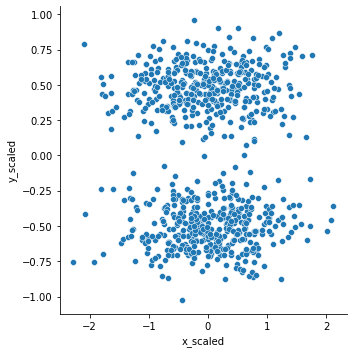

In [95]:
sns.relplot(data = X, x='x_scaled', y = 'y_scaled')

In [85]:
# Original data
df.describe()

,x,y,cluster
count,800.000000,800.000000,800.000000
mean,0.508449,2.973206,0.477500
std,9.906209,3.156376,0.499806
min,-30.572062,-3.146259,0.000000
25%,-6.068600,-0.047636,0.000000
50%,0.581809,3.040642,0.000000
75%,7.579269,5.996474,1.000000
max,29.489457,8.817347,1.000000


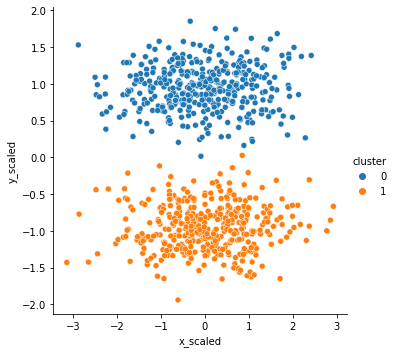

In [97]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

X = scaled_df[['x_scaled','y_scaled']]

kmean = KMeans(n_clusters=2, random_state=123)
kmean.fit(X)
scaled_df["cluster"] = kmean.predict(X)

sns.relplot(data = scaled_df, x='x_scaled', y='y_scaled', hue='cluster')

# How to choose which features to cluster and in which combinations?
# How to choose k value algorithmically